## Gravitional Pull of a Uniform Sheet
A uniform rectangular sheet of length $L$ and width $W$ is floating motionless in space.
![](sheet.png)
The sheet has negligible thickness and has a mass $M$. Consider a point mass a distance $z$ from the center of the sheet with mass $m$.

The gravitional force on the mass in the $x$ and $y$ directions will cancel out since there is the same amount of mass on both sides. The only component that matters is the one along the $z$-axis. So,
$$F_z = \int dF_z = Gm\int \frac{dM}{r^2}\cos\theta$$
$$= Gm\int\frac{\sigma dA}{r^2}\frac{z}{r} = Gm\sigma z\int_{-W/2}^{W/2}\int_{-L/2}^{L/2} \frac{1}{(x^2 + y^2 + z^2)^{3/2}} dx\;dy$$
and $\vec{F} = F_z \hat{k}$ since there is only a $z$ component. So,
$$\vec{F} = \big(Gm\sigma z\int_{-W/2}^{W/2}\int_{-L/2}^{L/2} \frac{1}{(x^2 + y^2 + z^2)^{3/2}} dx\;dy\big)\hat{k}$$

Now, to calculate this.

In [0]:
# imports
import numpy as np
import pylab

# define constants

G = 6.674e-11 # m^3kg^-1s^-2

def f(x, y, z):
    return 1/(x**2 + y**2 + z**2) ** 1.5

# define parameters

L = 10 # m
W = 10 # m
z = 10 # m
M = 10000 # kg
A = L * W # m^2
sigma = M / A # kg / m^2
ax = -L / 2 # m
bx = L / 2 # m
ay = -W / 2 # m
by = W / 2 # m

In [0]:
# define some functions

# interpolating polynomial
def phi(k, x, samples):
    N = len(samples)
    return np.prod([1 if m == k else (x - samples[m]) / (samples[k] - samples[m]) for m in range(N)])

# def Phi(f, x, samples):
#     N = len(samples)
#     return sum([f(samples[k]) * phi(k, x) for k in range(N)])

def simpsons(f, a, b, N=10):
    h = (b - a) / N
    return 1/3 * h * (f(a) + f(b) + 4 * sum([f(a + (2*k - 1) * h) for k in range(1, int(N/2) + 1)]) + 2 * sum([f(a + 2 * k * h) for k in range(1, int(N/2))]))

def weights(a, b, samples):
    N = len(samples)
    return [simpsons(lambda x: phi(k, x, samples), a, b) for k in range(N)]


Now, everything to take the integral using Monto Carlo integration (random sample points) is setup. So, this is what we will do.

In [0]:
def create_sample(N, a, b):
    while True:
        arr = [np.random.random() * (b - a) + a for _ in range(N)]
        unique = True
        for i in range(len(arr)):
            for j in range(len(arr)):
                if i != j and np.abs(arr[i] - arr[j]) < 0.0001:
                    unique = False
        if unique:
            return arr

def create_2d_sample(N, ax, bx, ay, by):
    return [create_sample(N, ax, ay), create_sample(N, ay, ay)]

def create_2d_weights(two_sample, ax, bx, ay, by):
    return [weights(ax, bx, two_sample[0]), weights(ay, by, two_sample[1])]

def monte_carlo_2d(f, two_sample, weights):
    return sum([sum([weights[0][i] * weights[1][j] * f(two_sample[0][i], two_sample[1][j]) for j in range(N)]) for i in range(N)])

def f2(x, y):
    return x + y

# two_sample = create_2d_sample(10, 0, 1, 0, 2);
# two_weights = create_2d_weights(two_sample, 0, 1, 0, 2)
# monte_carlo_2d(f2, two_sample, two_weights)

This is where I'm giving up on monte carlo integration and just using simpson's rule.

In [0]:
def double_simpsons(f, a, b, c, d, N = 10):
    def F(y):
        return simpsons(lambda x: f(x, y), a, b, N)
    return simpsons(F, c, d, N)

# double_simpsons(lambda x, y: 1, 0, 5, 0, 5, N=100)

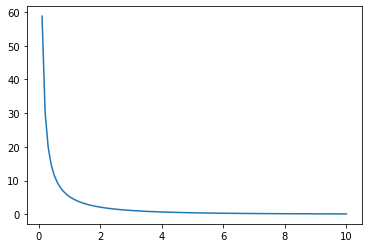

In [7]:
def force(z):
    return double_simpsons(lambda x, y: f(x, y, z), ax, bx, ay, by, N=100)

force(z)

xs = np.linspace(0.1, 10, 100)
ys = [force(x_s) for x_s in xs]
pylab.plot(xs, ys)
pylab.show()